In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


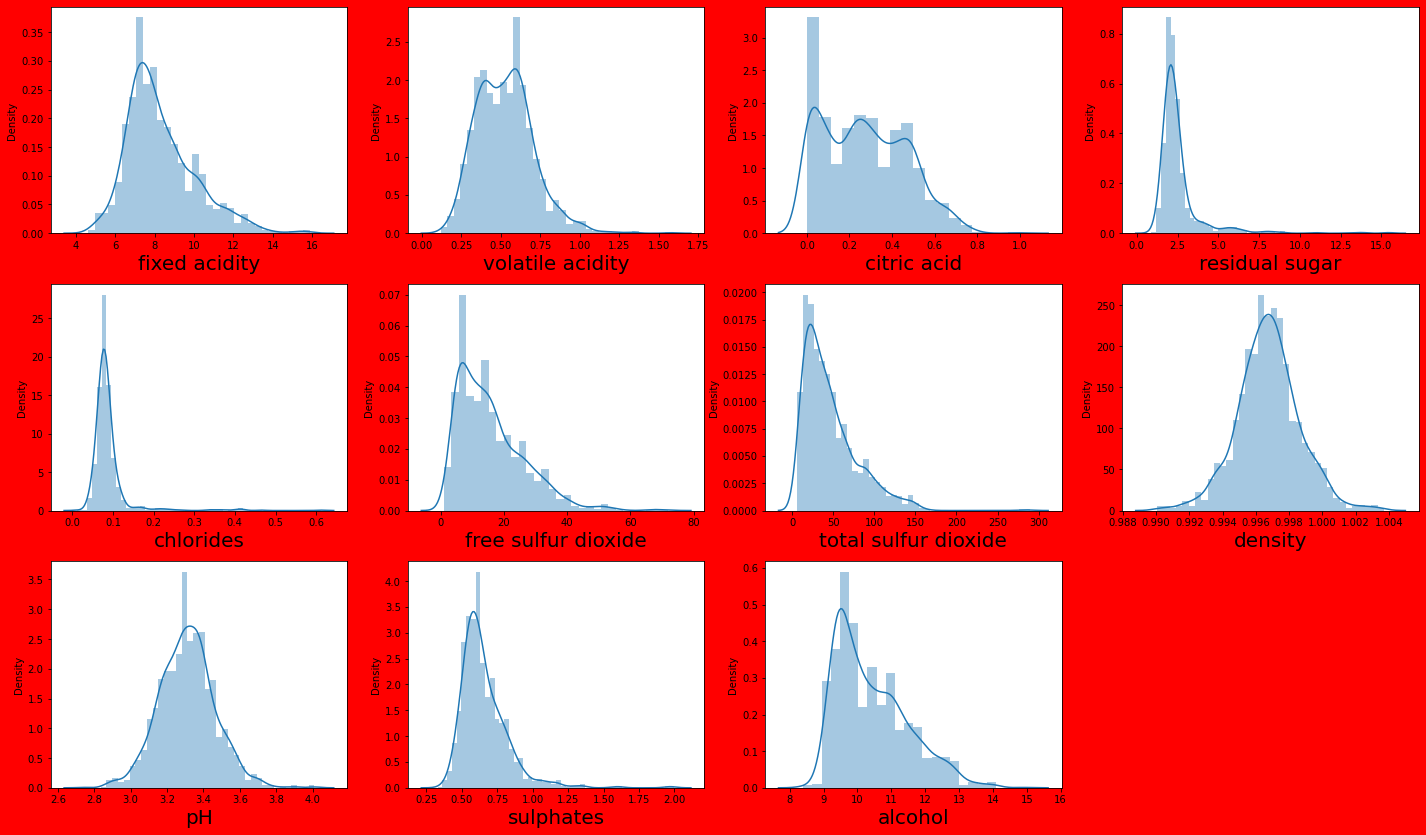

In [21]:
plt.figure(figsize=(20,15),facecolor='red')
plotno=1
for column in df:
    if plotno<=11:
        ax=plt.subplot(4,4,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()

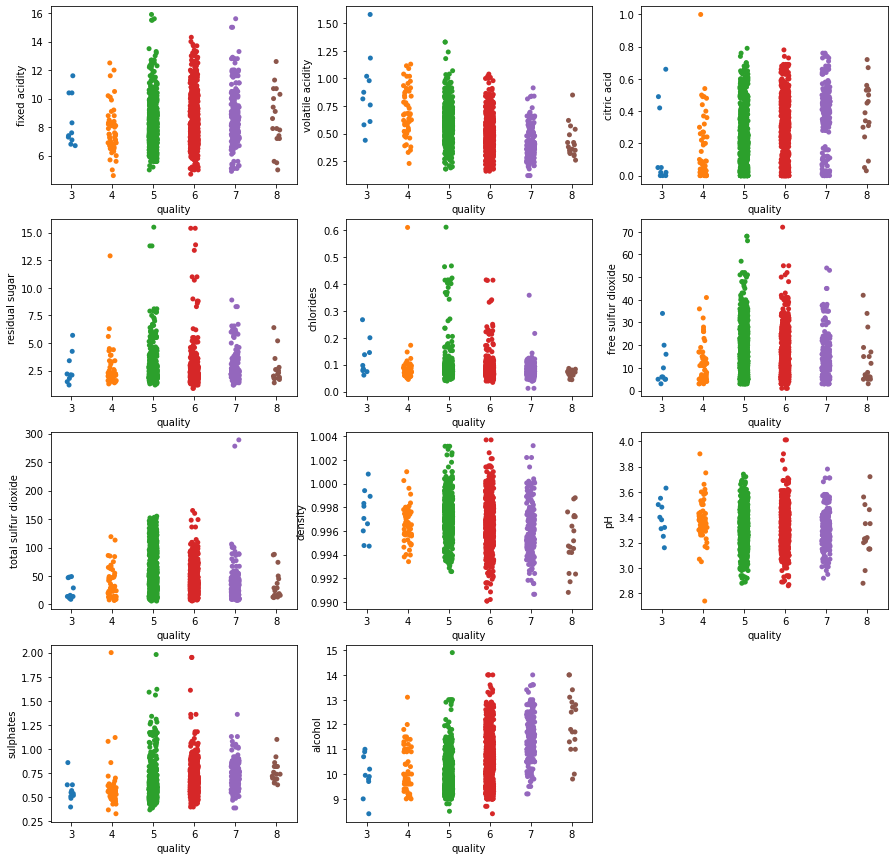

In [26]:
plt.figure(figsize=(15,15))
plotno=1
for column in x:
    if plotno<=11:
        ax=plt.subplot(4,3,plotno)
        sns.stripplot(y,x[column])
    plotno+=1
plt.show()

In [70]:
df['goodquality'] = [0 if X >= 6 else 1 for X in df['quality']]
x = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsc = sc.fit_transform(x)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(xsc,y,test_size=0.22,random_state=666)

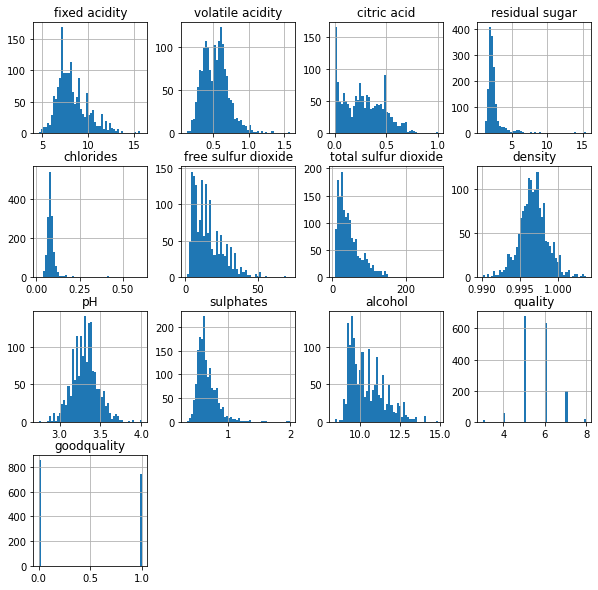

In [72]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [73]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n ---- Train result ----")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n ---- Test result ----")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n Test Classification report \n',classification_report(y_test,pred,digits=2))

In [74]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
df['goodquality'].value_counts()

0    855
1    744
Name: goodquality, dtype: int64

In [77]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 ---- Train result ----
Accuracy Score : 100.00%

 ---- Test result ----
Accuracy Score : 72.16%


 Test Classification report 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       195
           1       0.70      0.67      0.68       157

    accuracy                           0.72       352
   macro avg       0.72      0.72      0.72       352
weighted avg       0.72      0.72      0.72       352



In [78]:
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [79]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [81]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [82]:
clf=DecisionTreeClassifier(criterion='gini',max_depth= 10, max_leaf_nodes= 9, min_samples_leaf= 4, min_samples_split= 3)

In [83]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [84]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 ---- Train result ----
Accuracy Score : 76.18%

 ---- Test result ----
Accuracy Score : 69.03%


 Test Classification report 
               precision    recall  f1-score   support

           0       0.69      0.79      0.74       195
           1       0.68      0.57      0.62       157

    accuracy                           0.69       352
   macro avg       0.69      0.68      0.68       352
weighted avg       0.69      0.69      0.69       352



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.6988636363636364


In [86]:
print(clf.predict(sc.transform([[7.2,0.81,0.05,1.6,0.092,21,51,0.9999,3.44,0.6,9.7]])))

[1]


In [87]:
pickle.dump(clf,open('Winequality','wb'))

In [88]:
print(knn.predict(sc.transform([[7.2,0.81,0.05,1.6,0.092,21,51,0.9999,3.44,0.6,9.7]])))

[1]
